## Linear Regression with Normal equation

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = df.values
y = boston.target

In [7]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [10]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [11]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.55236459846306

In [12]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.72402343733974

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

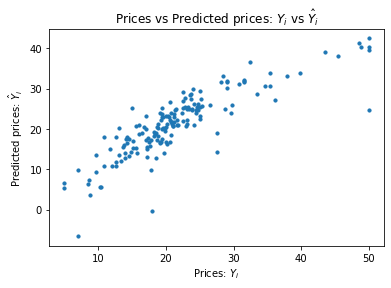

In [13]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [14]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Linear Regression with SGD

In [16]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [19]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [20]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [24]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(150381353800434.97, 2.26145515708516e+28)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

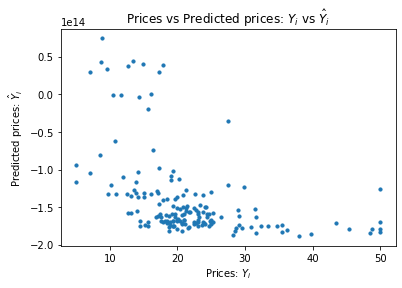

In [25]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [27]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [28]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [29]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.600367581954748, 21.163381889100172)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

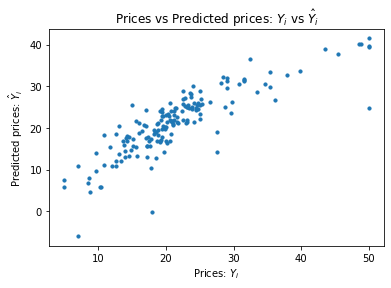

In [30]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Linear Regression with Ridge & Lasso regression

In [31]:
from sklearn.linear_model import Lasso, Ridge


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [33]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5)

In [34]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.579058484791169, 20.967776607137992)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

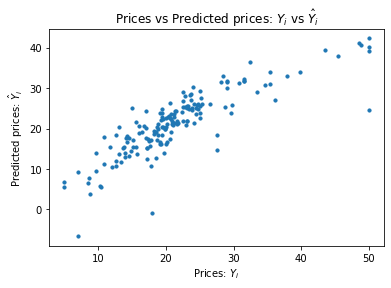

In [35]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [36]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

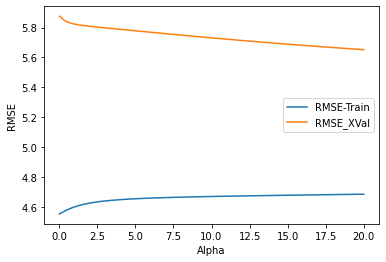

In [37]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [38]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.7242
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5687
RMSE on 10-fold CV: 5.8487
